In [2]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn  as skl
from numpy import asarray

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline      
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier
from sklearn.svm           import SVC

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# Getting the dataset
data = pd.read_csv(r'C:\Users\rnr31\Documents\GitHub\apple_watch_tracker\dataset_5sec.csv')
data

In [ ]:
data.drop(['Unnamed: 0','id', 'activityrecognition#0','user'],axis=1, inplace=True)
data_col = ['time','activityrecognition_1']
for i in data.columns[2:58]:
    b = i.split('.')[2].split('#')
    data_col.append(f'{b[0]}_{b[1]}')

for i in data.columns[58:66]:
    b = i.split('#')
    data_col.append(f'{b[0]}_{b[1]}')

data_col.append('target')
data = pd.DataFrame.from_records(data.values)
data.columns = data_col

data.head()


In [ ]:

data['target']= data['target'].apply({'Bus':0, 'Car':1, 'Still':2, 'Train':3, 'Walking':4}.get)
data.head()

In [ ]:
x = data.drop(['target'], axis=1)
y = data['target']


In [ ]:
x= x.fillna(0)
x

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0, stratify=y)

In [ ]:

tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees": ExtraTreesClassifier(n_estimators=100),
  "Random Forest": RandomForestClassifier(n_estimators=100),
  "AdaBoost": AdaBoostClassifier(n_estimators=100),
  "Skl GBM": GradientBoostingClassifier(n_estimators=100),
  "Skl HistGBM": HistGradientBoostingClassifier(max_iter=100),
  "XGBoost": XGBClassifier(n_estimators=100),
  "LightGBM": LGBMClassifier(n_estimators=100),
  "CatBoost":  CatBoostClassifier(n_estimators=100),
}

In [ ]:
tree_classifiers = {name: make_pipeline(model) for name, model in tree_classifiers.items()}

results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

In [ ]:
rang = abs(y_train.max()) + abs(y_train.min())
for model_name, model in tree_classifiers.items():
    
    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(x_test)
    
    results = results.append({"Model":    model_name,
                              "Accuracy": accuracy_score(y_test, pred)*100,
                              "Bal Acc.": balanced_accuracy_score(y_test, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              
results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

In [ ]:
results_ord

In [3]:
df = pd.read_csv(r'C:\Users\rnr31\Documents\GitHub\apple_watch_tracker\dataset_0.5sec.csv')
df

,Unnamed: 0,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0,156661,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,1,156662,4.0,NaN,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,2,156663,5.0,NaN,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,3,156664,6.0,NaN,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,4,156665,7.0,NaN,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,62580,82695,4066.0,NaN,51.0,10.105329,10.089159,10.135641,0.026270,0.834765,...,89.761985,89.761985,89.761985,NaN,0.00,0.00,0.00,NaN,Walking,U1
62581,62581,77608,604.0,NaN,100.0,9.544118,9.544118,9.544118,14.491194,0.965309,...,89.747010,89.747010,89.747010,NaN,1.50,1.50,1.50,NaN,Walking,U1
62582,62582,85219,1341.0,NaN,100.0,14.258467,14.258467,14.258467,0.829544,0.773370,...,89.729460,89.729460,89.729460,NaN,0.00,0.00,0.00,NaN,Walking,U1
62583,62583,69368,1186.0,NaN,90.0,10.726491,10.726491,10.726491,7.089701,0.789832,...,89.778343,89.778343,89.778343,NaN,1.00,1.00,1.00,NaN,Walking,U1


C:\Users\rnr31\anaconda3\envs\ds22\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user', ylabel='count'>

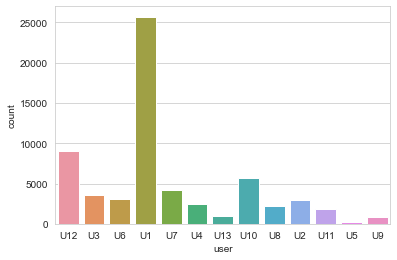

In [5]:
sns.countplot(df['user'])

In [ ]:
df.drop(['Unnamed: 0','id', 'activityrecognition#0','user'],axis=1, inplace=True)
data_col_new = ['time','activityrecognition_1']
for i in df.columns[2:58]:
    b = i.split('.')[2].split('#')
    data_col_new.append(f'{b[0]}_{b[1]}')

for i in df.columns[58:66]:
    b = i.split('#')
    data_col_new.append(f'{b[0]}_{b[1]}')

data_col_new.append('target')
df = pd.DataFrame.from_records(df.values)
df.columns = data_col_new

df['target']= df['target'].apply({'Bus':0, 'Car':1, 'Still':2, 'Train':3, 'Walking':4}.get)

In [ ]:
x_new = data.drop(['target'], axis=1)
y_new = data['target']

x_new = x_new.fillna(0)

x_train_check, x_test_check, y_train_check, y_test_check = train_test_split(x_new, y_new, random_state=0, test_size=0.5, stratify=y_new) 



In [ ]:
rang = abs(y_train_check.max()) + abs(y_train_check.min())
results_train_check = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})
for model_name, model in tree_classifiers.items():
    
    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(x_train_check)
    
    results_train_check = results_train_check.append({"Model":    model_name,
                            "Accuracy": accuracy_score(y_train_check, pred)*100,
                            "Bal Acc.": balanced_accuracy_score(y_train_check, pred)*100,
                            "Time":     total_time},
                            ignore_index=True)
    

results_train_check_ord = results_train_check.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_train_check_ord.index += 1 
results_train_check_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

In [ ]:
results_train_check_ord

In [ ]:
rang = abs(y_test_check.max()) + abs(y_test_check.min())
results_test_check = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})
for model_name, model in tree_classifiers.items():
    
    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(x_test_check)

    results_test_check = results_test_check.append({"Model":    model_name,
                        "Accuracy": accuracy_score(y_test_check, pred)*100,
                        "Bal Acc.": balanced_accuracy_score(y_test_check, pred)*100,
                        "Time":     total_time},
                        ignore_index=True)
    
    


results_test_check_ord = results_test_check.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_test_check_ord.index += 1 
results_test_check_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

In [ ]:
results_test_check_ord